In [1]:
%matplotlib inline

In [2]:
# import the model class from modelflow package
from modelclass import model 
import modelmf       # Add useful features to pandas dataframes 
                     # using utlities initially developed for modelflow

model.widescreen()   # These modelflow commands ensure that outputs from modelflow play well with Jupyter Notebook
model.scroll_off()

%load_ext autoreload   
%autoreload 2


#Load a saved version of the Pakistan model and solve it, 
#saving the results in the model object mpak, and the resulting dataframe in bline

#Replace the path below with the location of the pak.pcim file on your computer
mpak,bline = model.modelload('..\models\pak.pcim', \
                                alfa=0.7,run=1,keep= 'Baseline')



file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [3]:
# Need statement to change the default format
mpak.smpl(2020,2030)
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpctlevel.mul100.df


,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,0.0,0.0
2021,0.0,0.0
2022,0.0,0.0
2023,0.0,0.0
2024,0.0,0.0
2025,0.0,0.0
2026,0.0,0.0
2027,0.0,0.0
2028,0.0,0.0
2029,0.0,0.0


In [4]:
#Make a copy of the baseline dataframe
oilshockdf=mpak.basedf
oilshockdf=oilshockdf.mfcalc("<2025 2027> WLDFCRUDE_PETRO = WLDFCRUDE_PETRO +25")

compdf=mpak.basedf.loc[2000:2030,['WLDFCRUDE_PETRO']]
compdf['LASTDF']=oilshockdf.loc[2000:2030,['WLDFCRUDE_PETRO']]
compdf['Dif']=compdf['LASTDF']-compdf['WLDFCRUDE_PETRO']

compdf.loc[2024:2030]



,WLDFCRUDE_PETRO,LASTDF,Dif
2024,80.367180,80.367180,0.0
2025,85.336809,110.336809,25.0
2026,90.613742,115.613742,25.0
2027,96.216983,121.216983,25.0
2028,102.166709,102.166709,0.0
2029,108.484346,108.484346,0.0
2030,115.192643,115.192643,0.0


In [5]:
#Simulate the model 
ExogOilSimul = mpak(oilshockdf,2020,2040,keep='$25 increase in oil prices 2025-27') 

In [6]:
with mpak.set_smpl(2020,2030):
    print(mpak['WLDFCRUDE_PETRO'].dif.df);

      WLDFCRUDE_PETRO
2020              0.0
2021              0.0
2022              0.0
2023              0.0
2024              0.0
2025             25.0
2026             25.0
2027             25.0
2028              0.0
2029              0.0
2030              0.0


C:\Users\ibhan\miniconda3\envs\mf_ftt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


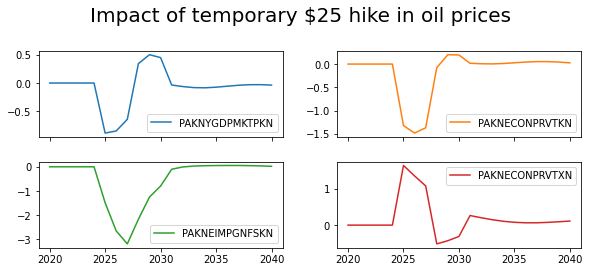

In [7]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNECONPRVTXN'].difpctlevel.mul100.plot(title="Impact of temporary $25 hike in oil prices")

In [8]:

print(round(mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNECONPRVTXN'].difpctlevel.mul100.df,2))

      PAKNYGDPMKTPKN  PAKNECONPRVTKN  PAKNEIMPGNFSKN  PAKNECONPRVTXN
2020            0.00            0.00            0.00            0.00
2021            0.00            0.00            0.00            0.00
2022            0.00            0.00            0.00            0.00
2023            0.00            0.00            0.00            0.00
2024            0.00            0.00            0.00            0.00
2025           -0.89           -1.32           -1.49            1.64
2026           -0.85           -1.48           -2.65            1.35
2027           -0.64           -1.37           -3.19            1.08
2028            0.34           -0.08           -2.17           -0.51
2029            0.50            0.20           -1.25           -0.43
2030            0.45            0.19           -0.80           -0.31
2031           -0.04            0.02           -0.10            0.26
2032           -0.06            0.01           -0.01            0.20
2033           -0.08            0.

C:\Users\ibhan\miniconda3\envs\mf_ftt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


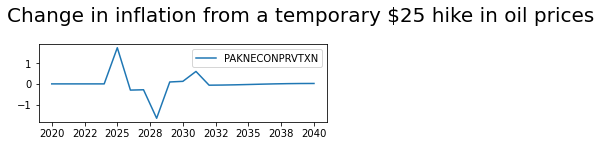

In [9]:
mpak['PAKNECONPRVTXN'].difpct.mul100.plot(title="Change in inflation from a temporary $25 hike in oil prices")

In [10]:
mpak.smpl() # reset the active sample period to the full model.
Cfixed=mpak.fix(bline,'PAKNECONPRVTKN')

The folowing variables are fixed
PAKNECONPRVTKN


In [11]:
Cfixed=Cfixed.upd("<2025 2040> PAKNECONPRVTKN_X  * 1.025")

C:\Users\ibhan\miniconda3\envs\mf_ftt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


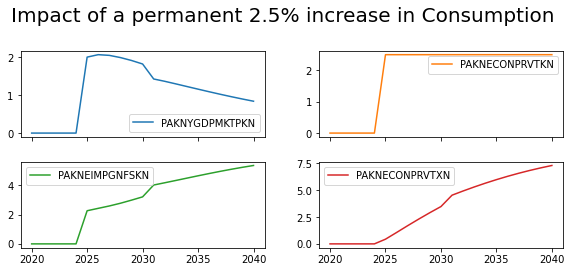

In [12]:
CFixedRes = mpak(Cfixed,2020,2040,keep='2.5% increase in C 2025-40') # simulates the model 
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNECONPRVTXN'].difpctlevel.mul100.plot(title="Impact of a permanent 2.5% increase in Consumption")


In [13]:
import pandas as pd
with pd.option_context('display.float_format', '{:,.2f}'.format):
    with mpak.set_smpl(2020,2040):
        print(mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNECONPRVTXN'].difpctlevel.mul100.df)


      PAKNYGDPMKTPKN  PAKNECONPRVTKN  PAKNEIMPGNFSKN  PAKNECONPRVTXN
2020            0.00            0.00            0.00            0.00
2021            0.00            0.00            0.00            0.00
2022            0.00            0.00            0.00            0.00
2023            0.00            0.00            0.00            0.00
2024            0.00            0.00            0.00            0.00
2025            2.01            2.50            2.27            0.44
2026            2.07            2.50            2.43            1.06
2027            2.05            2.50            2.59            1.69
2028            1.99            2.50            2.78            2.31
2029            1.92            2.50            2.99            2.90
2030            1.83            2.50            3.22            3.47
2031            1.43            2.50            4.03            4.53
2032            1.37            2.50            4.18            4.92
2033            1.30            2.

The folowing variables are fixed
PAKNECONPRVTKN


C:\Users\ibhan\miniconda3\envs\mf_ftt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


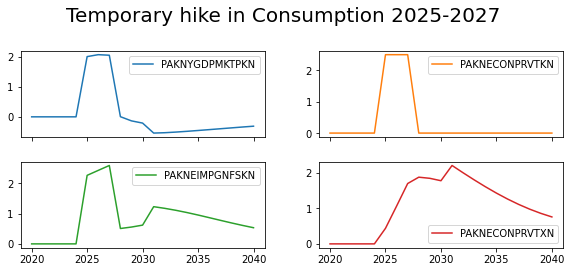

In [14]:
#reset the active sample period to the full period
mpak.smpl()                                  
# create a copy of the bline DataFrame, but setting the PAKNECONPRVTKN_D variable to 1 for the period 2025 through 2027
CTempExogAll=mpak.fix(bline,'PAKNECONPRVTKN') 
# multiply the exogenized value of consumption by 2.5% for 2025 through 2027
CTempExogAll=CTempExogAll.upd("<2025 2027> PAKNECONPRVTKN_X * 1.025")  

#Solve the model
CTempXAllRes = mpak(CTempExogAll,2020,2040,keep='2.5% increase in C 2025-27 -- exog whole period') # simulates the model 
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNECONPRVTXN'].difpctlevel.mul100.plot(title="Temporary hike in Consumption 2025-2027")



The folowing variables are fixed
PAKNECONPRVTKN


C:\Users\ibhan\miniconda3\envs\mf_ftt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


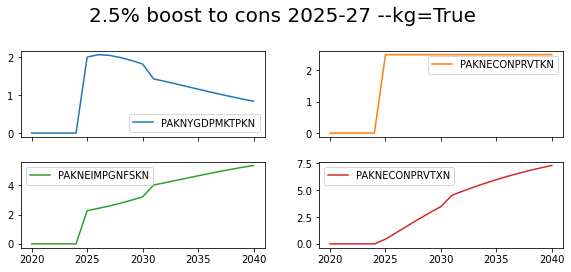

In [15]:
mpak.smpl() # reset the active sample period to the full model.
CTempExogAllKG=mpak.fix(bline,'PAKNECONPRVTKN')
CTempExogAllKG = CTempExogAllKG.upd('''
<2025 2027> PAKNECONPRVTKN_X * 1.025 --kg
''',lprint=0)

#Now we solve the model
CTempXAllResKG = mpak(CTempExogAllKG,2020,2040,keep='2.5% increase in C 2025-27 -- exog whole period --KG=True') # simulates the model 
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNECONPRVTXN'].difpctlevel.mul100.plot(title="2.5% boost to cons 2025-27 --kg=True")


The folowing variables are fixed
PAKNECONPRVTKN


C:\Users\ibhan\miniconda3\envs\mf_ftt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


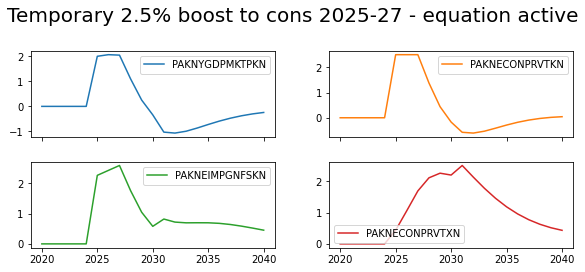

In [16]:
mpak.smpl() # reset the active sample period to the full model.
CExogTemp=mpak.fix(bline,'PAKNECONPRVTKN',2025,2027)                             #Consumption is exogenized only for three years 2025 2026 and 2027 PAKNECONPRVTKN_D=1 for 2025,2026, 2027 0 elsewhere.
CExogTemp = CExogTemp.upd('<2025 2027> PAKNECONPRVTKN_X * 1.025',lprint=0)       #In subsequent years it's level will be determined by the equation 

#Solve the model
CExogTempRes = mpak(CExogTemp,2020,2040,keep='2.5% increase in C 2025-27 -- temporarily exogenized') # simulates the model 
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNECONPRVTXN'].difpctlevel.mul100.plot(title="Temporary 2.5% boost to cons 2025-27 - equation active")



In [17]:
print('Consumption base and shock levels\r\n');

print('Real values in 2030');
print(f'Base value:  {bline.loc[2028,"PAKNECONPRVTKN"]:,.0f}.\tShocked value: {CExogTempRes.loc[2028,"PAKNECONPRVTKN"]:,.0f}.\r\n'
    f'Percent difference: {round(100*((CExogTempRes.loc[2030,"PAKNECONPRVTKN"]-bline.loc[2028,"PAKNECONPRVTKN"])/bline.loc[2028,"PAKNECONPRVTKN"]),2)}')
print('\r\nReal values in 2040');
print(f'Base value:  {bline.loc[2040,"PAKNECONPRVTKN"]:,.0f}.\tShocked value: {CExogTempRes.loc[2040,"PAKNECONPRVTKN"]:,.0f}.\r\n'
    f'Percent difference: {round(100*((CExogTempRes.loc[2040,"PAKNECONPRVTKN"]-bline.loc[2040,"PAKNECONPRVTKN"])/bline.loc[2040,"PAKNECONPRVTKN"]),2)}')

Consumption base and shock levels

Real values in 2030
Base value:  27,241,278.	Shocked value: 27,616,949.
Percent difference: 5.36

Real values in 2040
Base value:  38,676,995.	Shocked value: 38,693,167.
Percent difference: 0.04


In [18]:
mpak['*NY*'].des

PAKNYGDPDISCCN            : GDP Disc., LCU mn
PAKNYGDPDISCKN            : GDP Disc., 2000 LCU mn
PAKNYGDPFCSTCN            : GDP Factor Cost Local Currency units Volumes National base year
PAKNYGDPFCSTKN            : GDP Factor Cost Local Currency units Volumes National base year
PAKNYGDPFCSTXN            : GDP Factor Cost Local Currency units Implicit Price deflator
PAKNYGDPFCSTXN_A          : Add factor:GDP Factor Cost Local Currency units Implicit Price deflator
PAKNYGDPFCSTXN_D          : Fix dummy:GDP Factor Cost Local Currency units Implicit Price deflator
PAKNYGDPFCSTXN_FITTED     : Fitted  value:GDP Factor Cost Local Currency units Implicit Price deflator
PAKNYGDPFCSTXN_X          : Fix value:GDP Factor Cost Local Currency units Implicit Price deflator
PAKNYGDPGAP_              : Output Gap (% of Potential GDP)
PAKNYGDPMKTPCD            : GDP, Market Prices, US$ mn
PAKNYGDPMKTPCN            : GDP, Market Prices, LCU mn
PAKNYGDPMKTPCN_VALUE_2010 : PAKNYGDPMKTPCN_VALUE_2010
PAKNY

In [19]:
# This needs to be rewritten to use the eviews expression when published
mpak['PAKNEGDIFPRVKN'].frml


PAKNEGDIFPRVKN : FRML <DAMP,STOC> PAKNEGDIFPRVKN = (PAKNEGDIFPRVKN_A*PAKNEGDIKSTKKN(-1)+ (0.00212272413966296+0.970234989019907*(PAKNEGDIFPRVKN(-1)/PAKNEGDIKSTKKN(-2))+(1-0.970234989019907)*(((LOG(PAKNYGDPPOTLKN))-(LOG(PAKNYGDPPOTLKN(-1))))+PAKDEPR)+0.0525240494260597*((LOG(PAKNEKRTTOTLCN/PAKNYGDPFCSTXN))-(LOG(PAKNEKRTTOTLCN(-1)/PAKNYGDPFCSTXN(-1))))) *PAKNEGDIKSTKKN(-1)) * (1-PAKNEGDIFPRVKN_D)+ PAKNEGDIFPRVKN_X*PAKNEGDIFPRVKN_D $


In [20]:
#Create a DataFrame AFShock that is equal tothe baseline
AFShock=bline

#Display the level of the AF
print("Pre shock levels")
AFShock.loc[2025:2030,['PAKNEGDIFPRVKN_A','PAKNEGDIFPRVKN','PAKNEGDIKSTKKN']]

#print(AFShock.loc[2025:2030,'PAKNEGDIFPRVKN']/AFShock.loc[2025:2030,'PAKNYGDPMKTPKN']*100)


Pre shock levels


,PAKNEGDIFPRVKN_A,PAKNEGDIFPRVKN,PAKNEGDIKSTKKN
2025,-0.000458,1.602854e+06,4.730392e+07
2026,-0.000389,1.581104e+06,4.814879e+07
2027,-0.000331,1.569541e+06,4.900980e+07
2028,-0.000281,1.569141e+06,4.989869e+07
2029,-0.000239,1.580577e+06,5.082694e+07
2030,-0.000203,1.604394e+06,5.180590e+07


In [21]:
AFShock=AFShock.mfcalc("<2028 2028> PAKNEGDIFPRVKN_A = PAKNEGDIFPRVKN_A + (.01*PAKNYGDPMKTPKN/PAKNEGDIKSTKKN)");

print("Post shock levels")
AFShock.loc[2025:2030,'PAKNEGDIFPRVKN_A']

Post shock levels


2025   -0.000458
2026   -0.000389
2027   -0.000331
2028    0.005774
2029   -0.000239
2030   -0.000203
Name: PAKNEGDIFPRVKN_A, dtype: float64

C:\Users\ibhan\miniconda3\envs\mf_ftt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


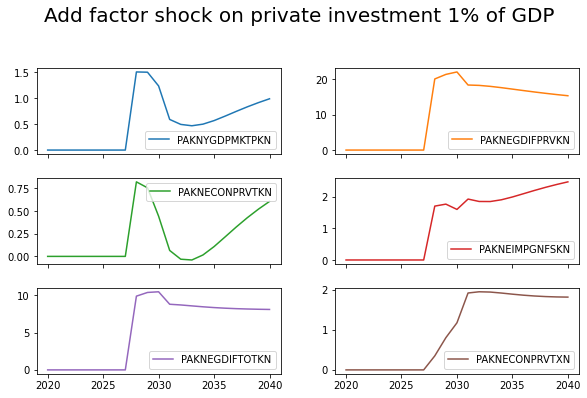

In [22]:
AFShockRes = mpak(AFShock,2020,2040,keep='1% of GDP increase in FDI and private investment (AF shock)')
mpak['PAKNYGDPMKTPKN PAKNEGDIFPRVKN PAKNECONPRVTKN PAKNEIMPGNFSKN PAKNEGDIFTOTKN PAKNECONPRVTXN'].difpctlevel.mul100.plot(title="Add factor shock on private investment 1% of GDP")


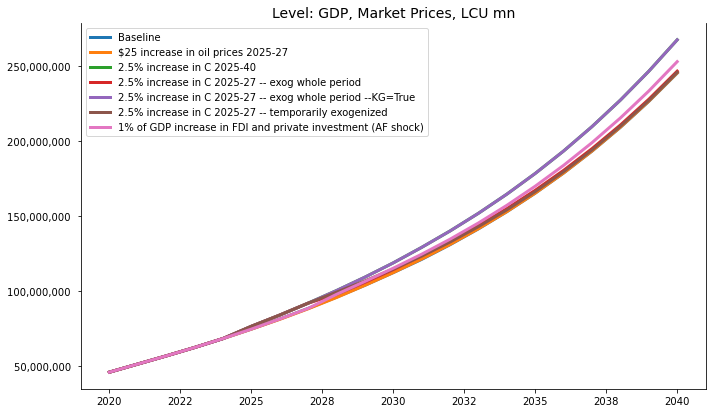

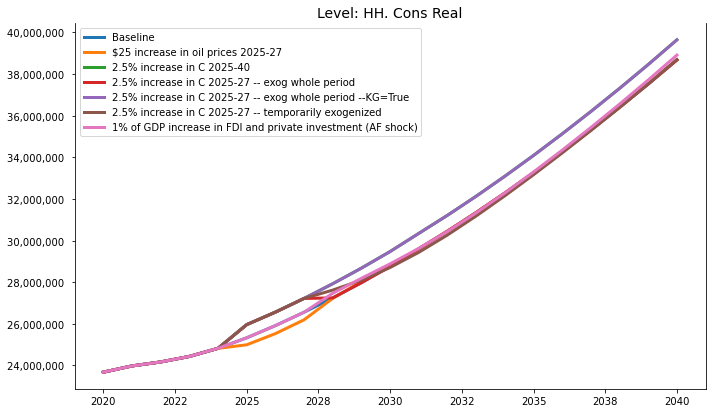

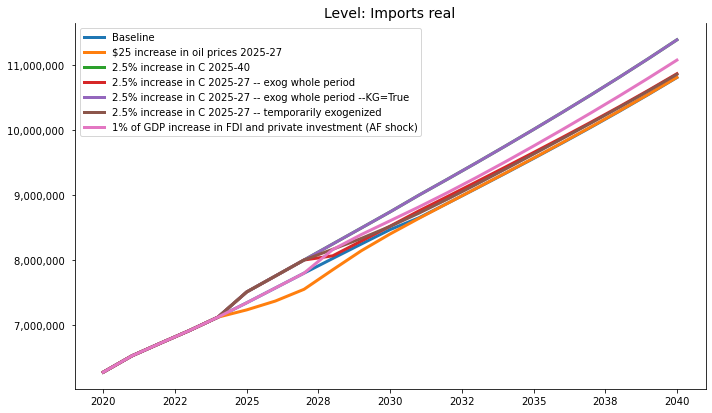

{'PAKNYGDPMKTPCN': <Figure size 720x432 with 1 Axes>,
 'PAKNECONPRVTKN': <Figure size 720x432 with 1 Axes>,
 'PAKNEIMPGNFSKN': <Figure size 720x432 with 1 Axes>}

In [23]:
mpak.keep_plot('PAKNYGDPMKTPCN PAKNECONPRVTKN PAKNEIMPGNFSKN',  legend=True)
#show for each variable on a separate chart the results from each kept scenario

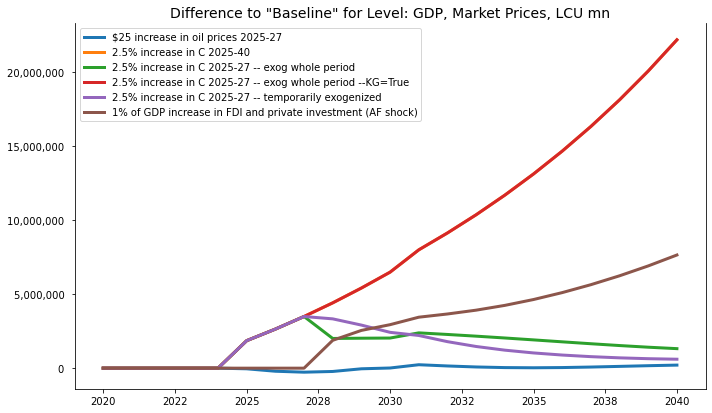

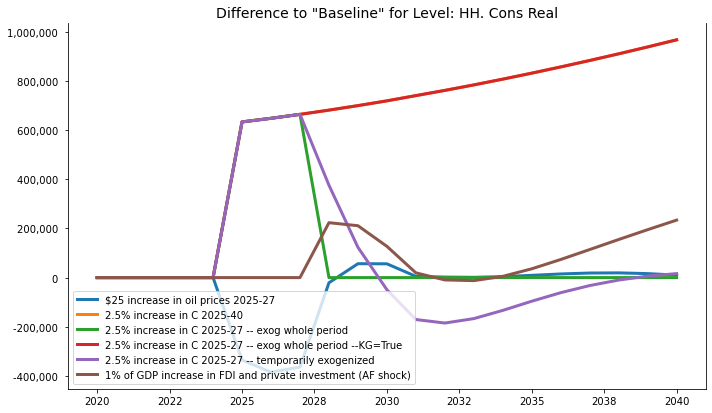

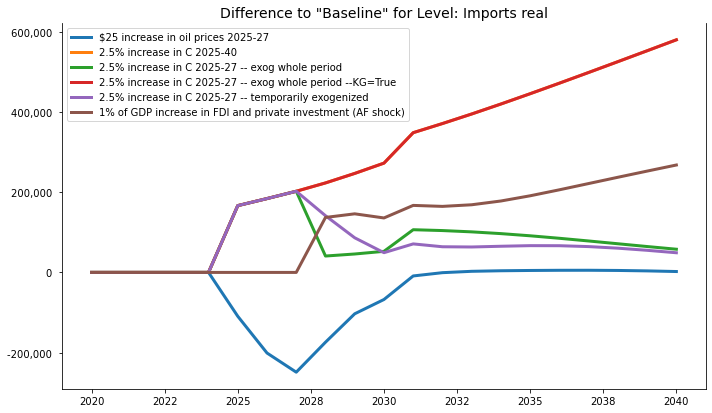

{'PAKNYGDPMKTPCN': <Figure size 720x432 with 1 Axes>,
 'PAKNECONPRVTKN': <Figure size 720x432 with 1 Axes>,
 'PAKNEIMPGNFSKN': <Figure size 720x432 with 1 Axes>}

In [24]:
mpak.keep_plot('PAKNYGDPMKTPCN PAKNECONPRVTKN PAKNEIMPGNFSKN', diff=1, legend=True)

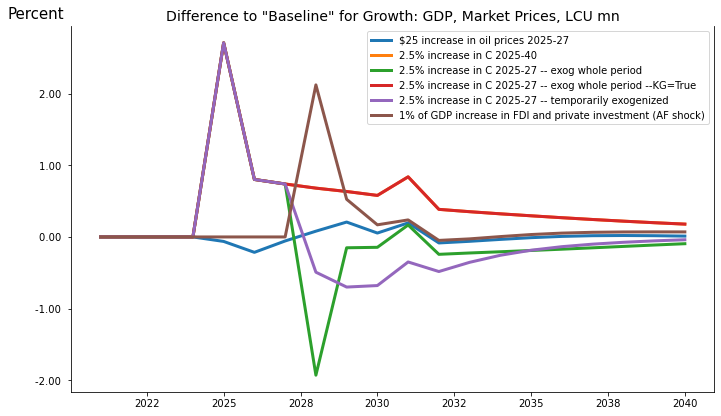

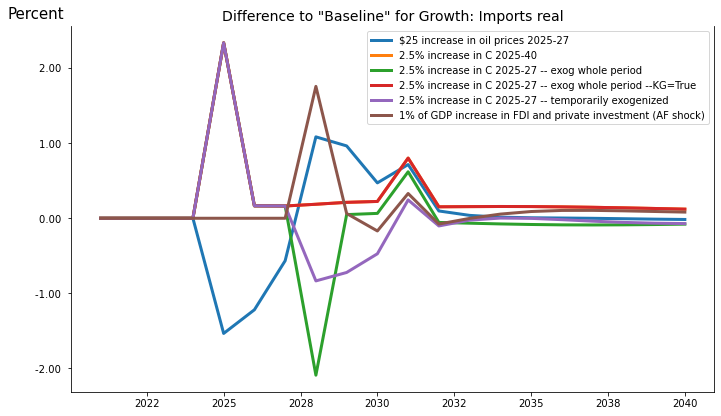

{'PAKNYGDPMKTPCN': <Figure size 720x432 with 1 Axes>,
 'PAKNEIMPGNFSKN': <Figure size 720x432 with 1 Axes>}

In [25]:
mpak.keep_plot('PAKNYGDPMKTPCN PAKNEIMPGNFSKN', diff=1,showtype='growth', legend=True)

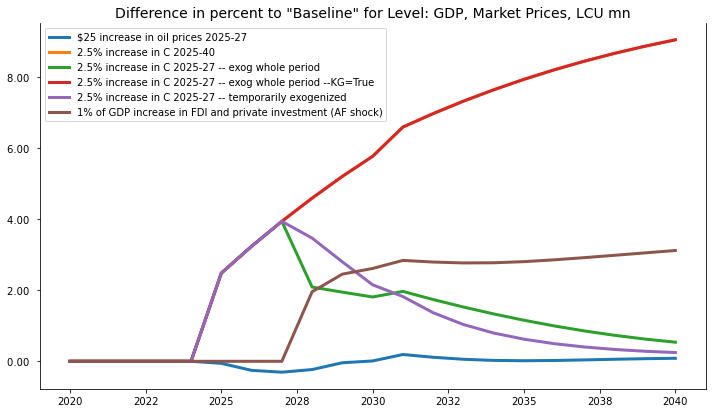

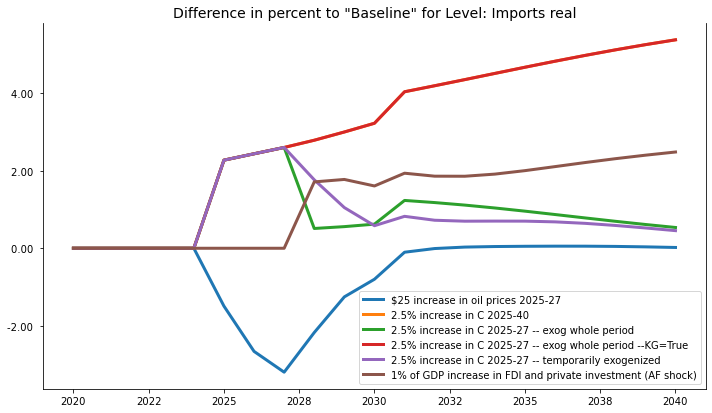

{'PAKNYGDPMKTPCN': <Figure size 720x432 with 1 Axes>,
 'PAKNEIMPGNFSKN': <Figure size 720x432 with 1 Axes>}

In [26]:
mpak.keep_plot('PAKNYGDPMKTPCN  PAKNEIMPGNFSKN', diffpct=1,legend="Change in level as a % of first keep scenario")


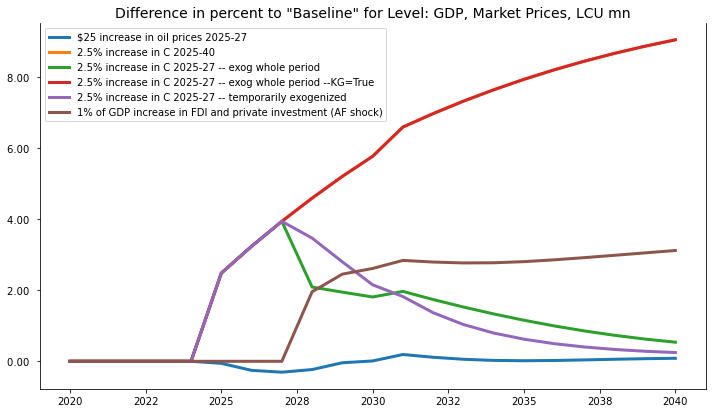

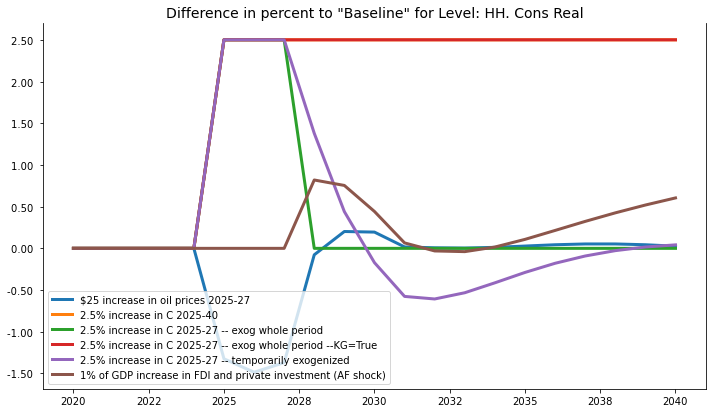

{'PAKNYGDPMKTPCN': <Figure size 720x432 with 1 Axes>,
 'PAKNECONPRVTKN': <Figure size 720x432 with 1 Axes>}

In [27]:
mpak.keep_plot('PAKNYGDPMKTPCN PAKNECONPRVTKN ', diffpct=1,showtype='level', legend=True)




In [28]:
mpak.keep_solutions.keys()


dict_keys(['Baseline', '$25 increase in oil prices 2025-27', '2.5% increase in C 2025-40', '2.5% increase in C 2025-27 -- exog whole period', '2.5% increase in C 2025-27 -- exog whole period --KG=True', '2.5% increase in C 2025-27 -- temporarily exogenized', '1% of GDP increase in FDI and private investment (AF shock)'])

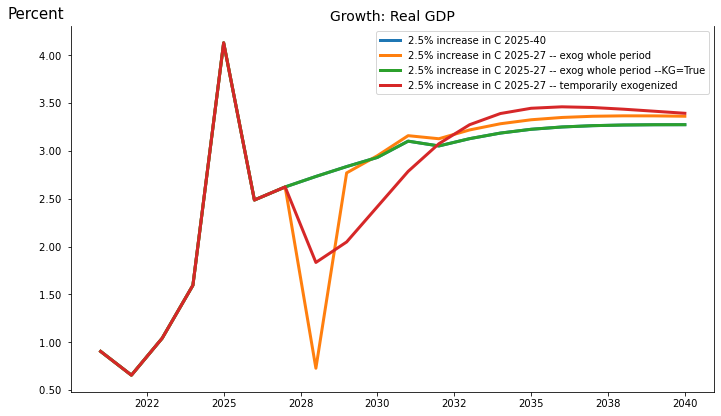

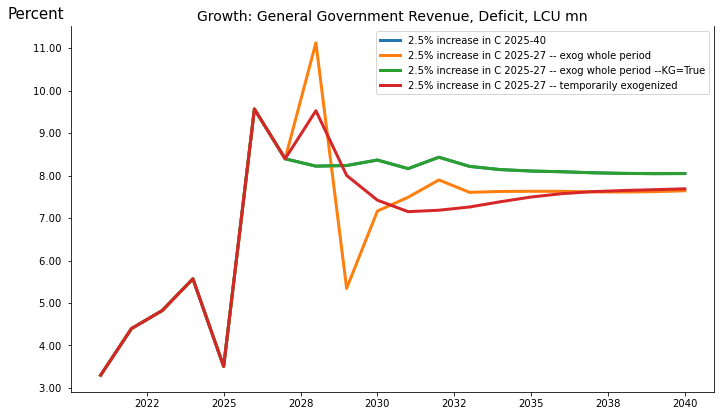

In [29]:
with mpak.keepswitch(scenarios='2.5% increase in C 2025-40|2.5% increase in C 2025-27 -- exog whole period|2.5% increase in C 2025-27 -- exog whole period --KG=True|2.5% increase in C 2025-27 -- temporarily exogenized'):
    mpak.keep_plot('PAKNYGDPMKTPKN PAKGGBALOVRLCN PAKGGDEBTTOTLCN',diff=False,showtype='growth',legend=True);

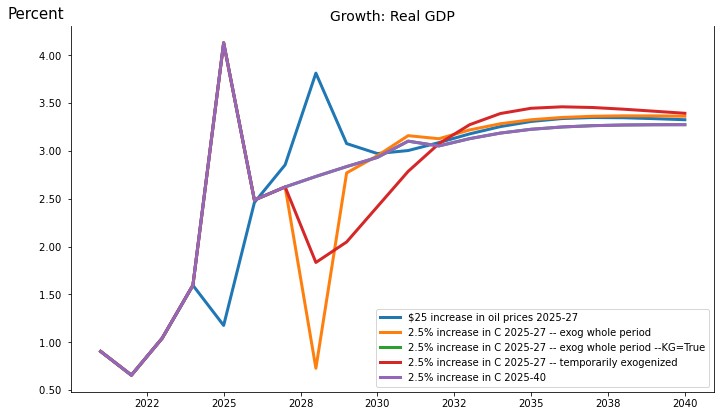

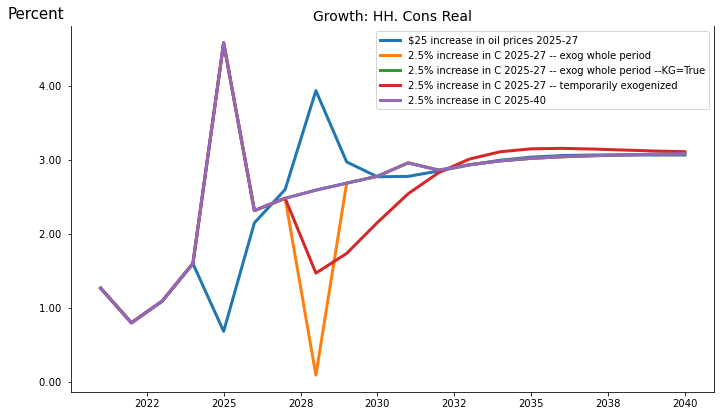

In [30]:

with mpak.keepswitch(scenarios='*2025*'):
    mpak.keep_plot('PAKNYGDPMKTPKN PAKNECONPRVTKN',showtype='growth',legend=True);

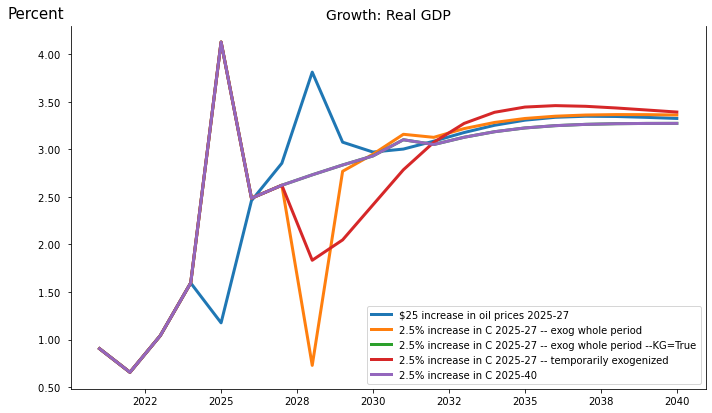

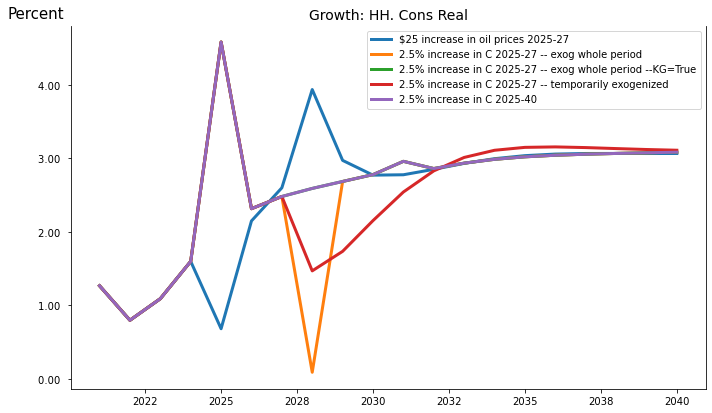

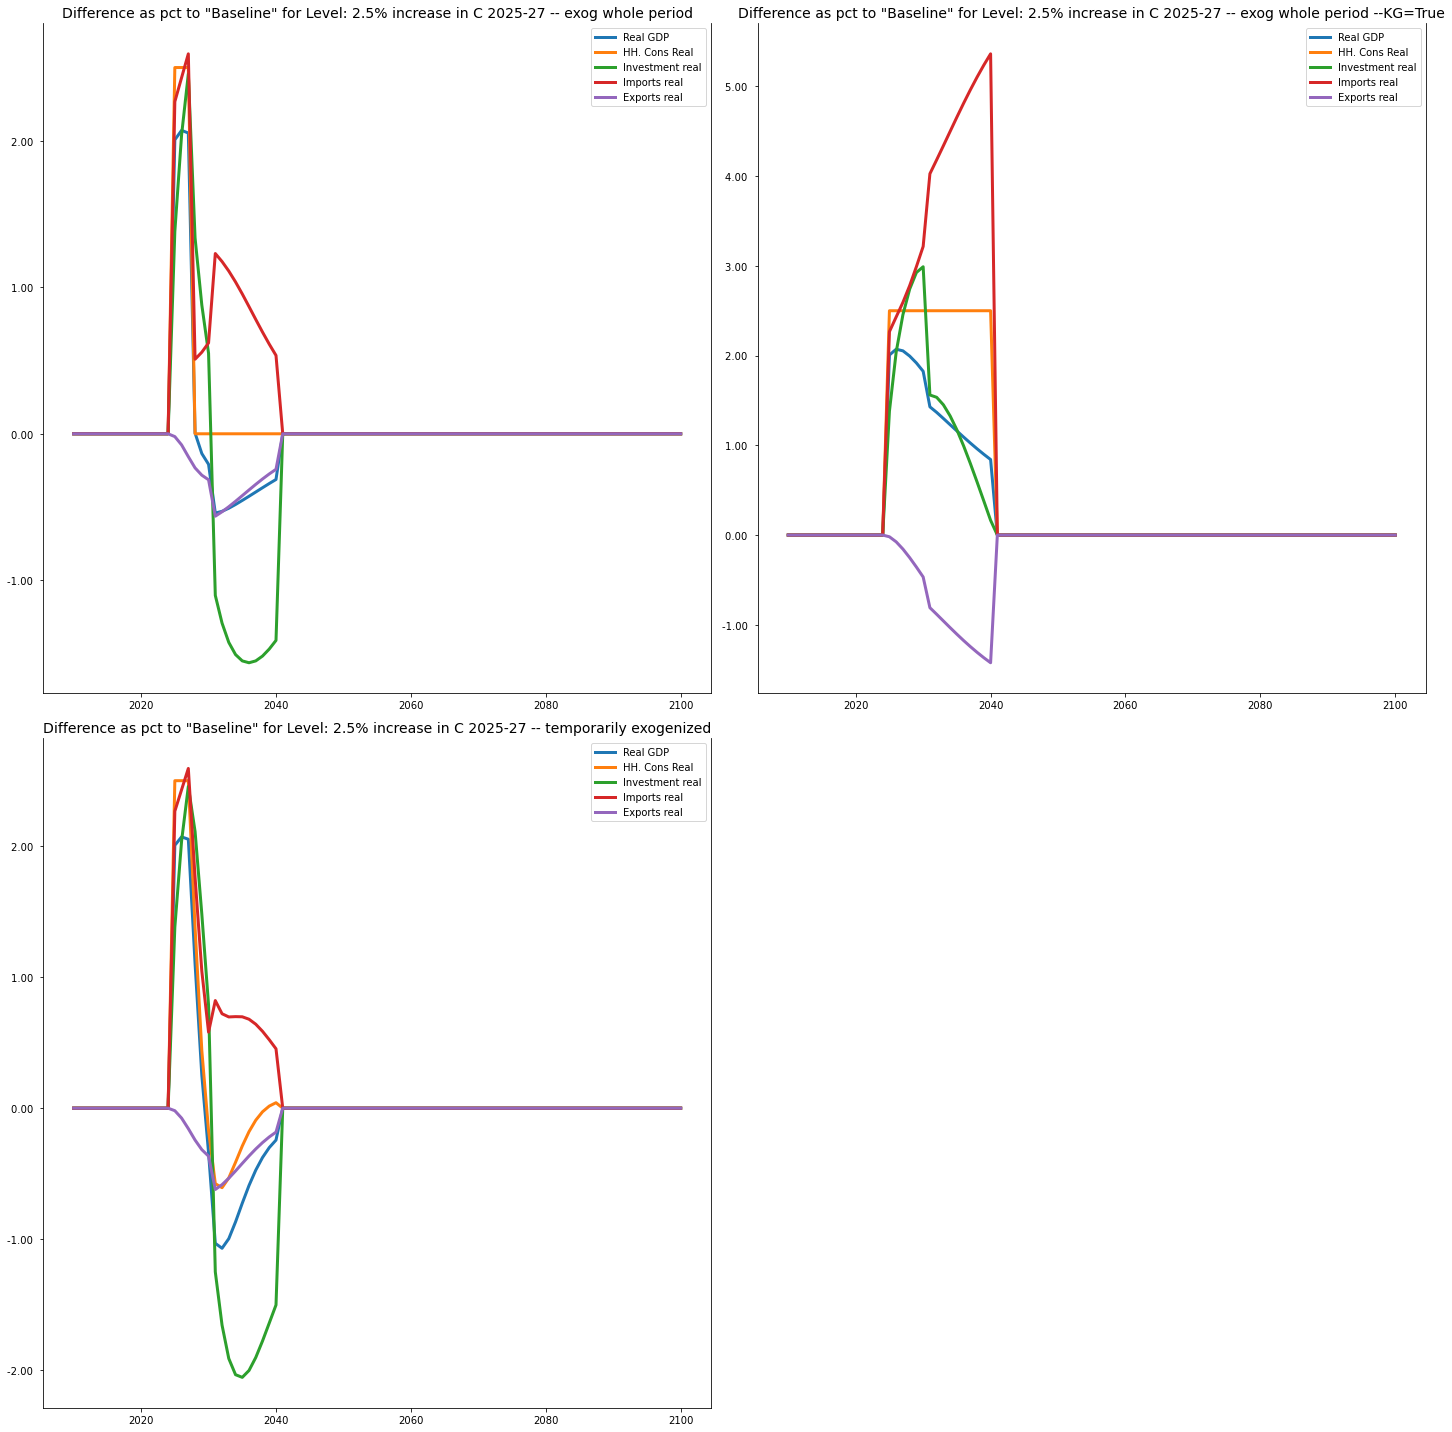

In [31]:
with mpak.set_smpl(2000,2040):
    with mpak.keepswitch(scenarios="baseline *exog*"):
        var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1
                                ,size=(20,20) ,diffpct=True,title=''  );

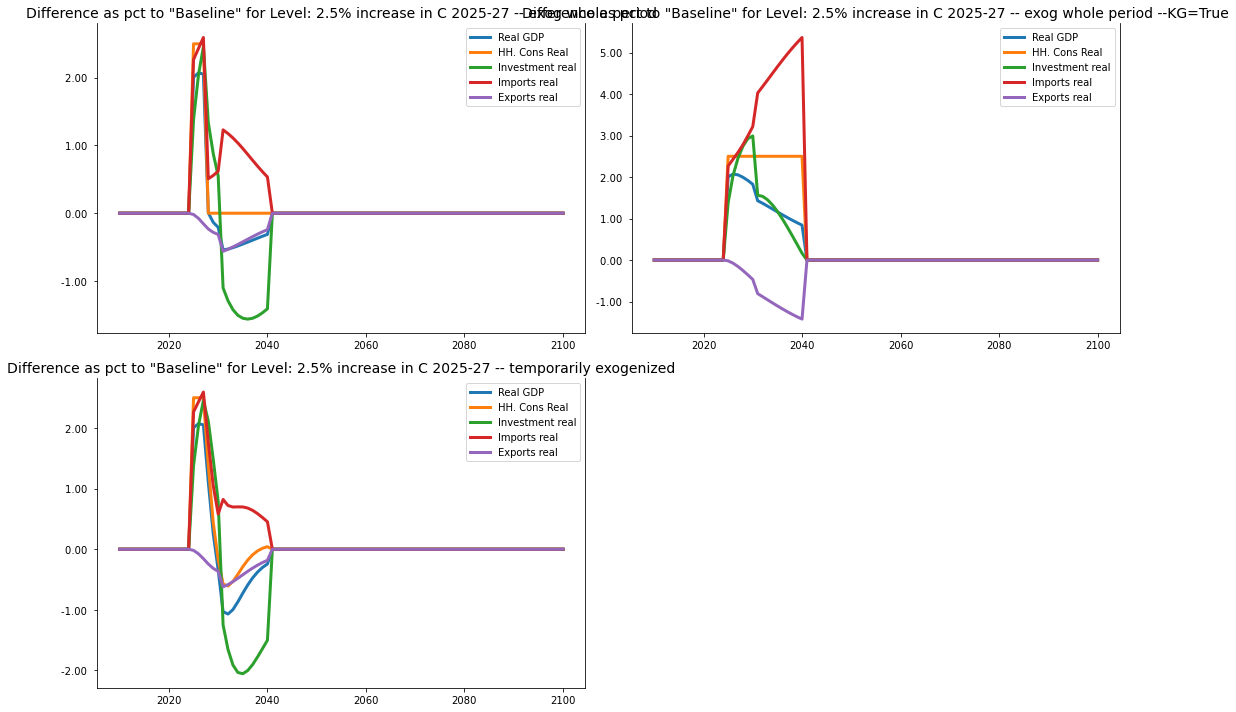

In [32]:
var_figs.set_size_inches(15,10)
var_figs

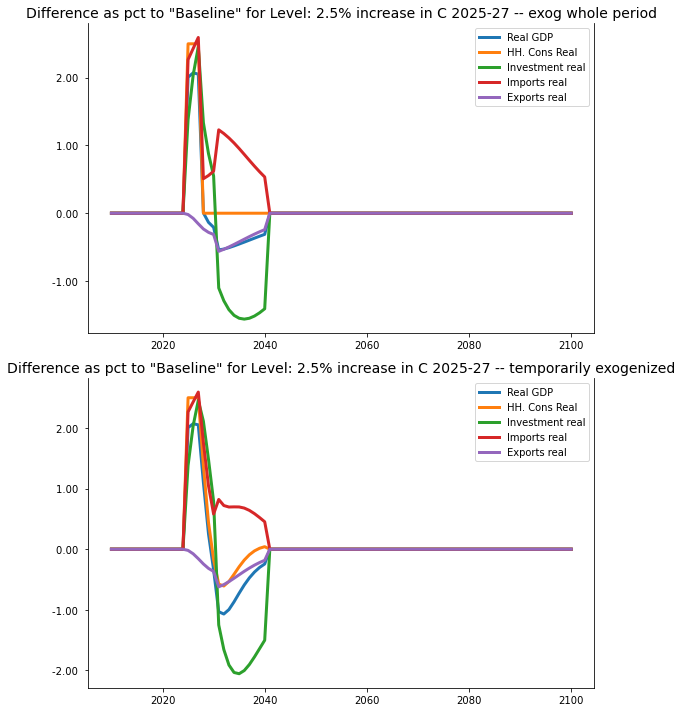

In [33]:
var_figs.axes[1].remove()
var_figs

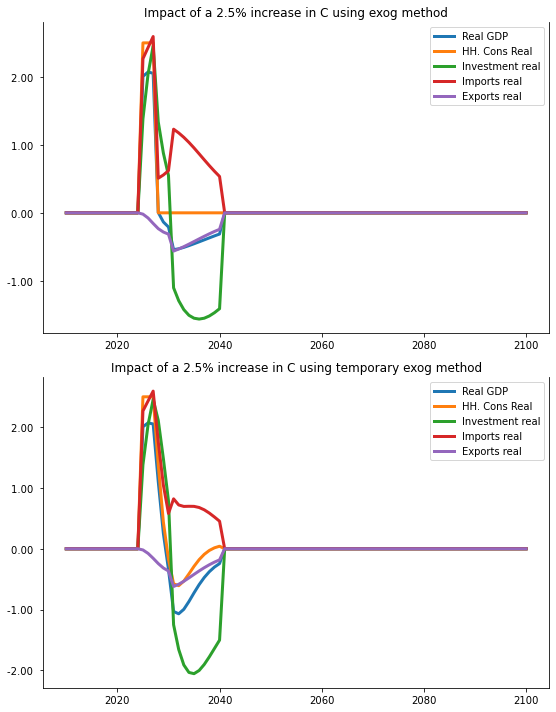

In [34]:
var_figs.axes[0].set_title('Impact of a 2.5% increase in C using exog method');    # many properties can be set afterward 
var_figs.axes[1].set_title('Impact of a 2.5% increase in C using temporary exog method');
var_figs

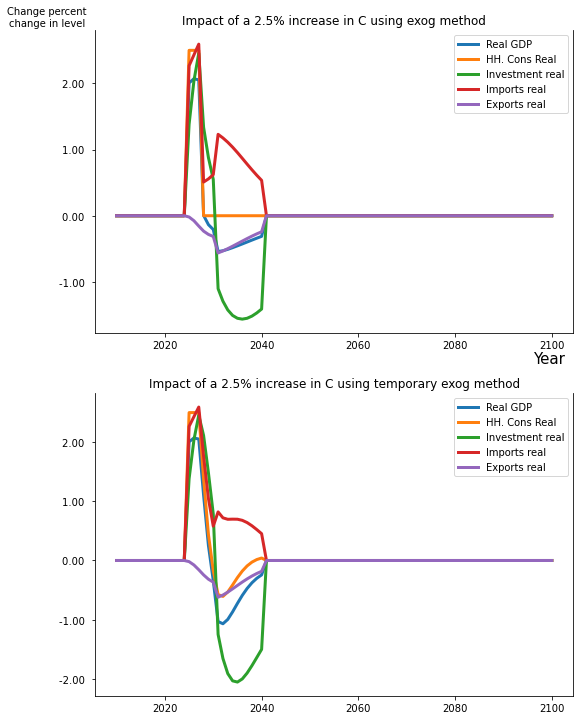

In [35]:
var_figs.axes[0].set_xlabel('Year')
var_figs.axes[0].set_ylabel('Change percent\nchange in level',fontsize=10)
var_figs.axes[0].yaxis.set_label_coords(-0.1,1.02)
var_figs.axes[0].xaxis.set_label_coords(.95,-.06)
var_figs

In [36]:
fig1=var_figs.axes[0]
fig2=var_figs.axes[1]


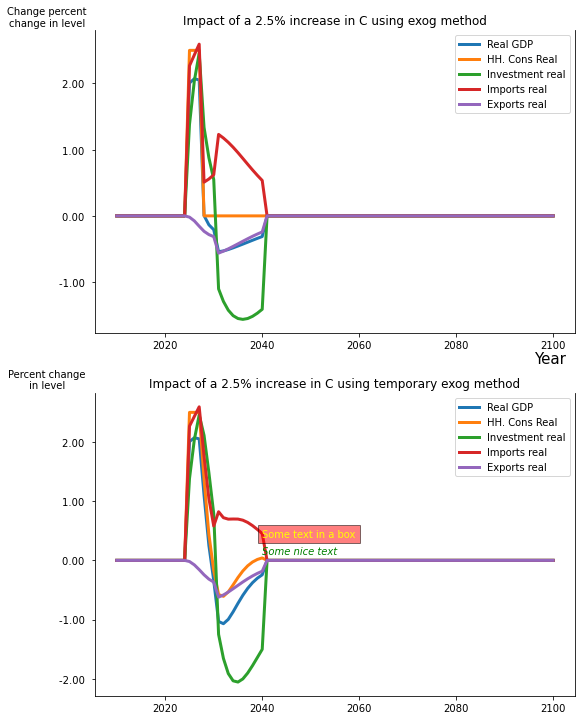

In [37]:
fig2.set_ylabel('Percent change\nin level',fontsize=10)
fig2.yaxis.set_label_coords(-0.1,1.02) #place axes labels
fig2.xaxis.set_label_coords(.95,-.06)



fig2.text(2040.,0.4, 'Some text in a box', 
          color='yellow',bbox=dict(facecolor='red', alpha=0.5));
fig2.text(2040.,0.1, 'Some nice text', 
          style='italic',color='green');
          
var_figs
          

In [38]:
mpak['PAKNYGDPMKTPCN PAKNYGDPMKTPKN PAKGGEXPTOTLCN PAKGGREVTOTLCN PAKNECONGOVTKN']